#  Importing the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.feature_selection import RFE
hel_data=pd.read_csv("Pima_Indian_diabetes.csv")
hel_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.600000,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.300000,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,19.179925,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,1


In [2]:
hel_data.isnull().sum()

Pregnancies                 26
Glucose                     16
BloodPressure                0
SkinThickness               22
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                         19
Outcome                      0
dtype: int64

In [3]:
hel_data.dropna(axis = 0, inplace= True)


# Getting some insights

In [4]:
hel_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,3.816722,119.905014,68.605819,20.111729,78.359467,31.703168,0.469499,33.423353,0.346154
std,3.409403,32.409446,19.449625,15.923286,115.326420,8.471361,0.337760,11.819330,0.476095
min,-4.798118,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.239750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,20.000000,32.000000,0.364000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.612250,41.000000,1.000000
max,16.047327,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,72.000000,1.000000


In [5]:
corr1=hel_data.corr()
corr1.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.09078,0.109165,-0.0963336,-0.107172,-0.0176203,-0.0486919,0.471411,0.175373
Glucose,0.09078,1,0.153401,0.0640365,0.329355,0.179916,0.140501,0.260544,0.45074
BloodPressure,0.109165,0.153401,1,0.225105,0.0997477,0.299163,0.0742781,0.228085,0.0583633
SkinThickness,-0.0963336,0.0640365,0.225105,1,0.429367,0.368944,0.194502,-0.129722,0.0847827
Insulin,-0.107172,0.329355,0.0997477,0.429367,1,0.195323,0.198996,-0.0521898,0.123601
BMI,-0.0176203,0.179916,0.299163,0.368944,0.195323,1,0.175405,0.0465719,0.284114
DiabetesPedigreeFunction,-0.0486919,0.140501,0.0742781,0.194502,0.198996,0.175405,1,0.035452,0.179783
Age,0.471411,0.260544,0.228085,-0.129722,-0.0521898,0.0465719,0.035452,1,0.214231
Outcome,0.175373,0.45074,0.0583633,0.0847827,0.123601,0.284114,0.179783,0.214231,1


In [6]:
hel_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

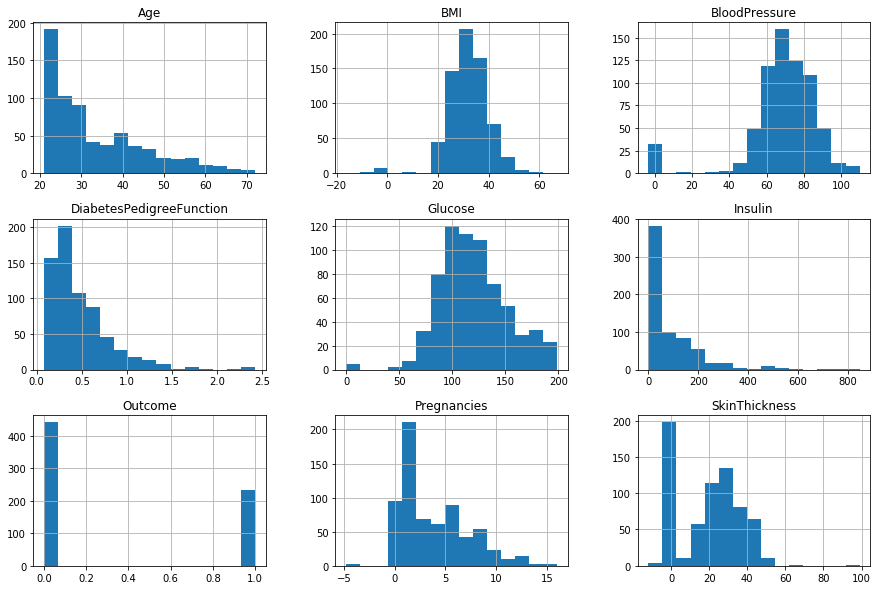

In [7]:
hel_data.hist(figsize=(15,10),bins=15)
plt.show()

# Above histograms shows that there are outliers ,we can use the box plot to get more insights about it

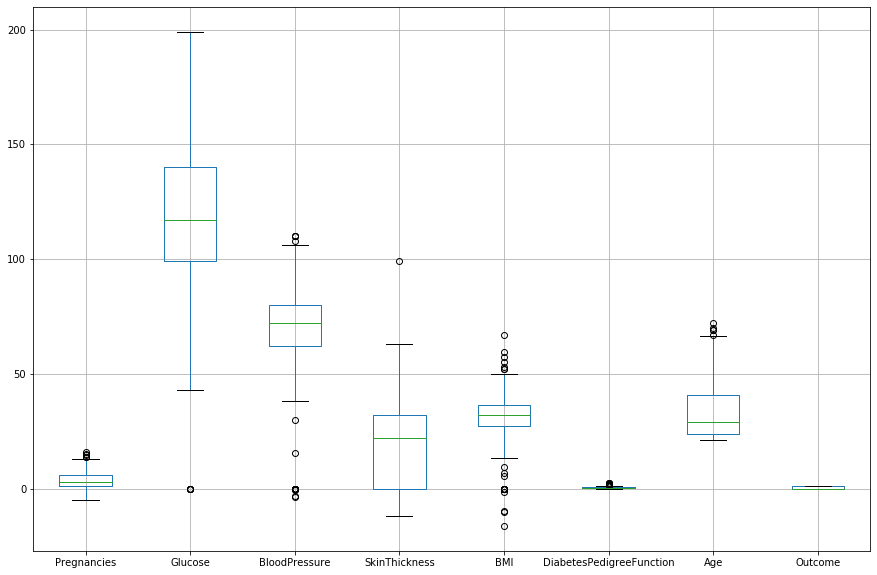

In [8]:
p1=hel_data.drop(axis=1,labels="Insulin")
p1.boxplot(figsize=(15,10))

plt.show()

# Data cleaning

Above box plot shows many outliers, which are dealt as shown below

In [9]:
hel_data[hel_data.Pregnancies<0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
650,-4.448934,91.0,54.0,25.0,100.0,25.2,0.234,23.0,0
666,-4.798118,145.0,82.0,18.0,0.0,32.5,0.235,70.0,1


Dropping these rows since the values provided in the column of Pregnancies are negative 

In [10]:
p1=hel_data.drop(axis=0,labels={650,666,738})

KeyError: '[738] not found in axis'

Replacing the null values in Pregnancies columns with median value to keep the uniformity of the data

In [ ]:
p1.Pregnancies.fillna(p1.Pregnancies.median(),inplace=True)

After replacing the Glucose null values using 140. This 140 is world average but its changing the covarience wayy too much to 
effect the model. So we tried to replcae it with the mean of the given data set which perfectly fits with our given data set 


In [ ]:
p1.Glucose.fillna(p1.Glucose.mean(),inplace=True)

In [ ]:
p3=p1.copy()

Testing that the zero values of glucose to be replaced by the mean or median

In [ ]:
p3.Glucose.replace(0,p3.Glucose.median(),inplace=True)

Replacing it with mean effects the corrrelation so it is not done, we have to replace it with median without 
effecting our correlation

BMI has 11 NULL values, So replacing it with mean

In [ ]:
p3.BMI.fillna(p3.BMI.mean(),inplace=True)

Filling null values in age with the mean 

In [ ]:
p3.Age.fillna(p3.Age.mean(),inplace=True)

Dropping the rows which contain the negative values of BMI

In [ ]:
p3=p3.drop(axis=0,labels={60,71,489,615})

Blood pressure can't be below 20, so there might be some error in data collection but dropping these 35 rows will
effect the model so we use the random to randomly redistribute this data in the range of 10% of it's mean

In [ ]:
p3[p3.BloodPressure<20].count()

In [ ]:
p3.BloodPressure = np.where(p3['BloodPressure'].between(-10,20),random.randint(60,75),p3.BloodPressure)

In [ ]:
#dropping the skin thickness outliers
p3=p3.drop(axis=0,labels={445,578,579})

Replacing the 0 values in skin thickness with Null and then doing and interpolation technique to fill them.
Replacing the zero values of BMI with it's mean because BMI can't be zero and it is one of the relevant feature

In [ ]:
p3.SkinThickness = np.where(p3['SkinThickness'].between(-30,-1),random.randint(18,22),p3.SkinThickness)
p3.SkinThickness.replace(0,np.NaN,inplace=True)
p3.BMI.replace(0,p3.BMI.mean(),inplace=True)
p3.BMI.interpolate(method='linear',limit_direction='forward',inplace=True)
p3.SkinThickness.interpolate(method='linear',limit_direction='forward',inplace=True)
p3.SkinThickness.fillna(p3.SkinThickness.mean(),inplace=True)

There is more than 350 zero values in insulin but with some domain knowledge it seen that the Diabates depand on the 
insulin level so we have to find a technique to fill the zero values, in order to do this again interpolation is used.
But since it the most relevant feature according to medical knowledge, finding the best fit among the methods (cubic, polynomial, quadratic, the best correlation) among all these is the quadratic one.

In [ ]:
p3.Insulin.replace(0,np.NaN,inplace=True)
p3.interpolate(method='quadratic',limit_direction='forward',inplace=True)
p3.Insulin.fillna(p3.Insulin.mean(),inplace=True)

# Finally checking the cleaned data and selecting the best features to use in the model. 

In [ ]:
corr=p3.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
p3.hist(figsize=(15,10),bins=15)
plt.show()

Selecting only the relevant features for the model which have high correlation with Output

# Finally using the Logistic regression model for the given dataset 

Splitting data in 80:20 for training and test 

In [ ]:
data=p3.loc[:,['Glucose','BMI','SkinThickness','Age','Insulin','DiabetesPedigreeFunction']]
data.head()
target=p3.iloc[:,8:9]
target.head()
xTrain, xTest, yTrain ,yTest=train_test_split(data, target, test_size = 0.2,random_state = 4)

In [ ]:
from sklearn.linear_model import LogisticRegression

Selecting Regularisation parameter to 0.5 and setting the weights to balanced

In [ ]:
#make an instance 
logistic_regression= LogisticRegression(C=0.5,class_weight='balanced')
logistic_regression.fit(xTrain,yTrain)

In [ ]:
score=logistic_regression.score(xTest,yTest)

Accuracy of my model is: (number of correct guesses)/(Total samples)

In [ ]:
score